In [1]:
import pandas as p
import numpy as n
import matplotlib.pyplot as m
import nltk
# nltk.download("punkt")

In [2]:
df = p.read_csv("Conversation.csv")
df.head(5)

,Unnamed: 0,question,answer
0,0,"hi, how are you doing?",i'm fine. how about yourself?
1,1,i'm fine. how about yourself?,i'm pretty good. thanks for asking.
2,2,i'm pretty good. thanks for asking.,no problem. so how have you been?
3,3,no problem. so how have you been?,i've been great. what about you?
4,4,i've been great. what about you?,i've been good. i'm in school right now.


In [3]:
df.drop(["Unnamed: 0"] , axis = 1 , inplace=True)
df.head(1)

,question,answer
0,"hi, how are you doing?",i'm fine. how about yourself?


In [4]:
df.dropna(inplace = True)
df["question"] = df["question"].astype(str)
df["answer"] = df["answer"].astype(str)

In [5]:
df["question"] = df["question"].astype(str)
df["answer"] = df["answer"].astype(str)

In [6]:
# import nltk
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer
lem = WordNetLemmatizer()

[nltk_data] Downloading package wordnet to /root/nltk_data...


In [7]:
def Doing_lemma(text):
  t = text.split(" ")
  res=""
  for i in t:
    res+=lem.lemmatize(i)+" "

  res.strip()
  return res

In [8]:
df["question"] = df["question"].apply(lambda x : Doing_lemma(x))
df["answer"] = df["answer"].apply(lambda x : Doing_lemma(x))

In [9]:
print(type(df["question"].loc[0]))

<class 'str'>


#**REMOVING STOPWORDS**

In [10]:
nltk.download("stopwords")
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [11]:
def remvo_stp(ly):
  ly = ly.lower().split(" ")
  res = ""
  for i in ly:
    if i in set(stopwords.words('english')):
      pass
    else:
      res = res + " " + i

  res = res.strip()

  return res

In [12]:
df["question"] = df["question"].apply(lambda x : remvo_stp(x))
df["answer"] = df["answer"].apply(lambda x : remvo_stp(x))

#**REMOVING PUNCTUATIONS**

In [13]:
import re

In [14]:
df["question"]=df["question"].replace("[^\w\s]","",regex=True)

In [15]:
df["answer"]=df["answer"].replace("[^\w\s]","",regex=True)

**VISUALIZING DATA**

In [16]:
from wordcloud import WordCloud
cl = WordCloud()

In [17]:
all_words_joined = " ".join(df["question"])

In [18]:
all_words_joined = all_words_joined + " ".join(df["answer"])

In [19]:
wrdc = WordCloud(width = 400,height = 400,background_color="black").generate(all_words_joined)

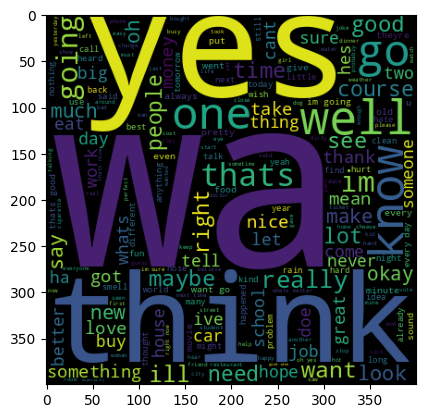

In [20]:
m.imshow(wrdc)

#**ENCODING BOTH QUESTION AND ANSWER**

In [21]:
unique_words =[]

for i in range(len(df.question)):
  q ,a= df.loc[i][0], df.loc[i][1]
  # print(q,type(q),"   " , a , type(a))
  club = q+" "+a
  # print(club)
  for wrd in club.split(" "):
    if wrd in unique_words:
      pass
    else:
      unique_words.append(wrd)

In [22]:
unique_words

['hi',
 'doing',
 'im',
 'fine',
 'yourself',
 'pretty',
 'good',
 'thanks',
 'asking',
 'problem',
 'been',
 'ive',
 'great',
 'you',
 'school',
 'right',
 'now',
 'go',
 'to',
 'pcc',
 'like',
 'there',
 'okay',
 'really',
 'big',
 'campus',
 'luck',
 'thank',
 'much',
 'hows',
 'going',
 'well',
 'never',
 'better',
 'lately',
 'actually',
 'attend',
 'attending',
 'enjoying',
 'bad',
 'lot',
 'people',
 'that',
 'today',
 'absolutely',
 'lovely',
 'everythings',
 'started',
 'recently',
 'far',
 'class',
 'wish',
 'ugly',
 'day',
 'know',
 'think',
 'may',
 'rain',
 'middle',
 'summer',
 'would',
 'weird',
 'yeah',
 'especially',
 'since',
 'ninety',
 'degree',
 'outside',
 'horrible',
 'rained',
 'wa',
 'hot',
 'yes',
 'be',
 'every',
 'too',
 'cant',
 'wait',
 'winter',
 'sometimes',
 'get',
 'cold',
 'id',
 'rather',
 'look',
 'nice',
 'later',
 'raining',
 'seem',
 'considering',
 'exactly',
 'cool',
 'one',
 'thats',
 'feel',
 'want',
 'come',
 'soon',
 'enjoy',
 'mean',
 'nic

In [23]:
wrds_to_num = {}
for index ,w in enumerate(unique_words):
  wrds_to_num[w]=index

In [24]:
num_to_wrd = {}
for ind , w1 in enumerate(unique_words):
  num_to_wrd[ind]=w1

#**NOW CONVERTING ALL SENTENCES TO SEQUENCE OF NUMBERS**

In [25]:
def sent_to_seq(text):
  t= text.split(" ")
  res=[]
  for w in t:
    res.append(wrds_to_num[w])

  return res

In [26]:
df["question"] = df["question"].apply(lambda x : sent_to_seq(x))
df["answer"] = df["answer"].apply(lambda x : sent_to_seq(x))

In [27]:
df.head(10)

,question,answer
0,"[0, 1]","[2, 3, 4]"
1,"[2, 3, 4]","[2, 5, 6, 7, 8]"
2,"[2, 5, 6, 7, 8]","[9, 10]"
3,"[9, 10]","[11, 12, 13]"
4,"[11, 12, 13]","[11, 6, 2, 14, 15, 16]"
5,"[11, 6, 2, 14, 15, 16]","[14, 17, 18]"
6,"[14, 17, 18]","[17, 19]"
7,"[17, 19]","[20, 21]"
8,"[20, 21]","[22, 23, 24, 25]"
9,"[22, 23, 24, 25]","[6, 26, 14]"


#**PADDING  QUESTIONS AND ANSWER COLUMNS**

In [28]:
from keras.preprocessing.sequence import pad_sequences
pad_ques = pad_sequences(df["question"])
pad_ans = pad_sequences(df["answer"])

In [29]:
print(pad_ques.shape)
print(pad_ans.shape)
print(len(unique_words))

(3725, 12)
(3725, 12)
2410


#**MAKING LSTM MODEL**

In [30]:
X = n.array(pad_ques)
X.ndim

2

In [31]:
X = X.reshape((3725,12,1))

In [32]:
from keras.utils import to_categorical
y1 = to_categorical(pad_ans)
y1.shape
y1 = n.array(y1)
y1=y1.reshape((3725,28920))

In [33]:
from keras.models import Sequential
from keras.layers import Dense,LSTM,Dropout
model = Sequential()

In [34]:
model.add(LSTM(12 , input_shape=(X.shape[1],X.shape[2])))
model.add(Dense(28920, activation='softmax' ))

In [35]:
model.compile(loss='categorical_crossentropy', optimizer="adam")

In [36]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 12)                672       
                                                                 
 dense (Dense)               (None, 28920)             375960    
                                                                 
Total params: 376632 (1.44 MB)
Trainable params: 376632 (1.44 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [37]:
fitted_model = model.fit(X, y1, batch_size=3725, epochs=10,verbose=1)

Epoch 1/10
1/1 [==============================] - 5s 5s/step - loss: 123.2667
Epoch 2/10
1/1 [==============================] - 2s 2s/step - loss: 123.1871
Epoch 3/10
1/1 [==============================] - 2s 2s/step - loss: 123.1071
Epoch 4/10
1/1 [==============================] - 2s 2s/step - loss: 123.0276
Epoch 5/10
1/1 [==============================] - 2s 2s/step - loss: 122.9480
Epoch 6/10
1/1 [==============================] - 2s 2s/step - loss: 122.8670
Epoch 7/10
1/1 [==============================] - 2s 2s/step - loss: 122.7849
Epoch 8/10
1/1 [==============================] - 1s 1s/step - loss: 122.7022
Epoch 9/10
1/1 [==============================] - 2s 2s/step - loss: 122.6190
Epoch 10/10
1/1 [==============================] - 2s 2s/step - loss: 122.5353


Text(0, 0.5, 'loss')

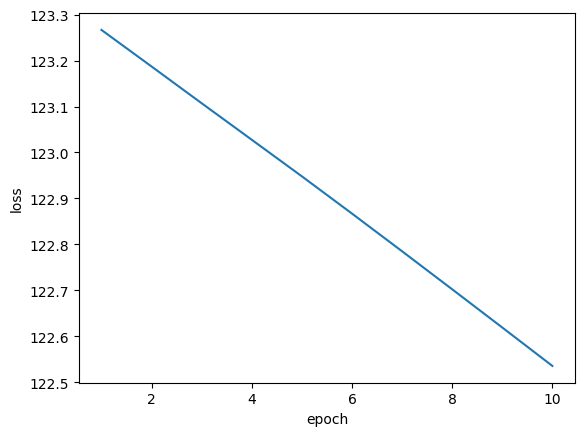

In [38]:
m.plot([i for i in range(1,11)] , fitted_model.history['loss'])
m.xlabel("epoch")
m.ylabel("loss")

#**PREDICTION**

In [39]:
def predic(text):
  t = Doing_lemma(text)
  print(t)
  t = remvo_stp(t)
  print(t)
  t = re.sub("[^\w\s]","",t)
  print(t)
  t = sent_to_seq(t)
  print(type(t))
  return t

In [40]:
ppp = predic("my school is not bad but i am good")

my school is not bad but i am good 
school bad good
school bad good
<class 'list'>


In [41]:
ppp = ppp + [0]*(12-len(ppp))

In [42]:
ppp = n.array(ppp)
ppp = ppp.reshape((1,12,1))

In [43]:
model_output_prob=model.predict(ppp)

1/1 [==============================] - 0s 426ms/step


In [44]:
minmod , maxmod = n.min(model_output_prob) , n.max(model_output_prob)

In [45]:
Real_out = n.argmin(model_output_prob)

In [46]:
def scale_number(number, min_value=0, max_value=2410, new_min=0, new_max=1):
    scaled_number = (number - min_value) / (max_value - min_value) * (new_max - new_min) + new_min
    return int(scaled_number)

In [47]:
sentt = []
Chat_input = str(input("Enter answer: "))
def all_pre(chat_in):
  ppp = predic(chat_in)
  ppp = ppp + [0]*(12-len(ppp))
  ppp = n.array(ppp)
  ppp = ppp.reshape((1,12,1))
  model_output_prob=model.predict(ppp)
  Real_out = n.argmax(model_output_prob)
  predict_wrd = scale_number(Real_out)
  tex = num_to_wrd[predict_wrd]
  print(predict_wrd , tex)

all_pre(Chat_input)

Enter answer: hello
hello 
hello
hello
<class 'list'>
1/1 [==============================] - 0s 20ms/step
11 ive


In [48]:
import random
from collections import deque

In [ ]:
def get_reward(user_response):

  if "thanks" in user_response.lower() or "helpful" in user_response.lower():
    return 1

  elif "bye" in user_response.lower() or "don't understand" in user_response.lower():
    return -2

  else:
    return 0.1

replay_memory = deque(maxlen=2000)

for epoch in range(5):
  for i in range(len(df)):
    question = df["question"].iloc[i]

    if not question:
      continue

    if not isinstance(question, str):
      question = str(question)

    try:
      question = sent_to_seq(question)
      question = np.array(question)
    except KeyError as e:
      print(f"Error encountered during question conversion: {e}")
      continue

    question = question.reshape(1, -1, 1)

    answer = df["answer"].iloc[i]

    if isinstance(answer, str):
      user_input_answer = answer
    else:
      user_input_answer = answer[0]

    predicted_word = model.predict(question)
    predicted_word = num_to_wrd[n.argmax(predicted_word)]

    possible_responses = {
        "good": ["That's great!", "Glad I could help."],
        "bad": ["Oh no, is there anything else I can do?", "I apologize, how can I improve?"],
        "neutral": ["Interesting.", "Tell me more."]
    }
    sentiment = random.choice(["good", "bad", "neutral"])
    user_input = possible_responses[sentiment][random.randint(0, 1)]

FUZZY LOGIC

In [50]:
!pip install scikit-fuzzy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 994.0/994.0 kB 5.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894078 sha256=cc9936d2a4c37836a07d627e5e8c8ebab5bac19a67796da6816b12d3eddd1091
  Stored in directory: /root/.cache/pip/wheels/4f/86/1b/dfd97134a2c8313e519bcebd95d3fedc7be7944db022094bc8
Successfully built scikit-fuzzy


In [51]:
from skfuzzy import control as ctrl

In [52]:
# use natural language toolkit
import nltk
from nltk.stem.lancaster import LancasterStemmer
import skfuzzy as fuzzy
from skfuzzy import control
import numpy as np
import itertools
from itertools import permutations
from sqlalchemy import null
from tqdm import tqdm

# word stemmer
stemmer = LancasterStemmer()

# 3 classes of training data
training_data = []
# capture unique stemmed words in the training corpus
corpus_words = {}
class_words = {}

In [53]:
def train_data():
    training_data.append({"class": "positive", "sentence": "alright"})
    training_data.append({"class": "positive", "sentence": "ok"})
    training_data.append({"class": "negative", "sentence": "not ok"})
    training_data.append({"class": "negative", "sentence": "sad"})
    training_data.append({"class": "negative", "sentence": "kill"})
    training_data.append({"class": "positive", "sentence": "ok"})
    training_data.append({"class": "positive", "sentence": "great"})
    training_data.append({"class": "positive", "sentence": "good"})
    training_data.append({"class": "positive", "sentence": "better"})
    training_data.append({"class": "negative", "sentence": "low"})
    training_data.append({"class": "negative", "sentence": "bad"})
    training_data.append({'class': 'positive', 'sentence':"good"})
    training_data.append({'class': 'positive', 'sentence':"thanks"})
    training_data.append({'class': 'positive', 'sentence':"asking"})
    training_data.append({'class': 'negative', 'sentence':"problem"})
    training_data.append({'class': 'positive', 'sentence':"been"})
    training_data.append({'class': 'positive', 'sentence':"ive"})
    training_data.append({'class': 'positive', 'sentence':"great"})
    training_data.append({'class': 'positive', 'sentence':"you"})
    training_data.append({'class': 'positive', 'sentence':"school"})
    training_data.append({'class': 'positive', 'sentence':"right"})
    training_data.append({'class': 'negative', 'sentence':"now"})
    training_data.append({'class': 'positive', 'sentence':"go"})
    training_data.append({'class': 'positive', 'sentence':"to"})
    training_data.append({'class': 'positive', 'sentence':"pcc"})
    training_data.append({'class': 'positive', 'sentence':"like"})
    training_data.append({'class': 'positive', 'sentence':"there"})
    training_data.append({'class': 'positive', 'sentence':"okay"})
    training_data.append({'class': 'negative', 'sentence':"really"})
    training_data.append({'class': 'positive', 'sentence':"big"})
    training_data.append({'class': 'negative', 'sentence':"campus"})
    training_data.append({'class': 'positive', 'sentence':"luck"})
    training_data.append({'class': 'negative', 'sentence':"thank"})
    training_data.append({'class': 'negative', 'sentence':"much"})
    training_data.append({'class': 'positive', 'sentence':"hows"})
    training_data.append({'class': 'positive', 'sentence':"going"})
    training_data.append({'class': 'negative', 'sentence':"well"})
    training_data.append({'class': 'negative', 'sentence':"never"})
    training_data.append({'class': 'negative', 'sentence':"better"})
    training_data.append({'class': 'positive', 'sentence':"lately"})
    training_data.append({'class': 'positive', 'sentence':"actually"})
    training_data.append({'class': 'negative', 'sentence':"attend"})
    training_data.append({'class': 'positive', 'sentence':"attending"})
    training_data.append({'class': 'positive', 'sentence':"enjoying"})
    training_data.append({'class': 'negative', 'sentence':"bad"})
    training_data.append({'class': 'positive', 'sentence':"lot"})
    training_data.append({'class': 'negative', 'sentence':"people"})
    training_data.append({'class': 'positive', 'sentence':"that"})
    training_data.append({'class': 'positive', 'sentence':"today"})
    training_data.append({'class': 'negative', 'sentence':"absolutely"})
    training_data.append({'class': 'positive', 'sentence':"lovely"})
    training_data.append({'class': 'negative', 'sentence':"everythings"})
    training_data.append({'class': 'positive', 'sentence':"started"})

    print("%s sentences of training data" % len(training_data))

In [54]:
def preprocess():
    nltk.download('punkt')

    classes = list(set([a['class'] for a in training_data])) #list into a set of unique items and then a list again to remove duplicates
    for c in classes:

        class_words[c] = [] # prepare a list of words within each class

    # loop through each sentence in training data
    for data in training_data:
        # tokenizing each sentence into words
        for word in nltk.word_tokenize(data['sentence']):
            # ignore some things
            if word not in ["?", "'s"]:
                # stem and lowercase each word
                stemmed_word = stemmer.stem(word.lower())

                if stemmed_word not in corpus_words:
                    corpus_words[stemmed_word] = 1
                else:
                    corpus_words[stemmed_word] += 1

                class_words[data['class']].extend([stemmed_word])

    print("Corpus words and counts: %s \n" % corpus_words)
    print("Class words: %s" % class_words)

In [55]:
# calculating a score for a given class taking into account word commonality
def calculate_class_score(sentence, class_name, show_details=True):
    score = 0
    # tokenize each word in our new sentence
    for word in nltk.word_tokenize(sentence):
        # checking if stem of the word is in any of our classes
        if stemmer.stem(word.lower()) in class_words[class_name]:
            # treat each word with relative weight
            score += (1 / corpus_words[stemmer.stem(word.lower())])

            if show_details:
                print("   match: %s (%s)" % (stemmer.stem(word.lower()), 1 / corpus_words[stemmer.stem(word.lower())]))
    return score

In [56]:
# return the class with the highest score for the sentence
def classify(sentence):
    high_class = None
    high_score = 0
    # loop through classes
    for c in class_words.keys():
        # calculating score of the sentence for each class
        score = calculate_class_score(sentence, c, show_details=False)
        # track of the highest score
        if score > high_score:
            high_class = c
            high_score = score

    print("class:", high_class, "score:", high_score)
    return high_class

anx_rls = list()
anx_list = list()
str_list = list()
dep_list = list()
inputs = ['NA', 'SOT', 'GOT', 'MOT']
comb = list(permutations(inputs))
len(comb)
c = list(itertools.product(inputs, inputs, inputs, inputs, inputs, inputs, inputs))
x = 0
z = 0
lisZ = list()
total = 0
for i in c:
    for y in i:
        if y == 'NA':
            total = total + 0
        elif y == 'SOT':
            total = total + 1
        elif y == 'GOT':
            total = total + 2
        elif y == 'MOT':
            total = total + 3
    lisZ.append(total * 2)
    total = 0

for x in lisZ:
    if x >= 0 and x <= 7:
        anx_list.append("Normal")
    elif x >= 8 and x <= 9:
        anx_list.append("Mild")
    elif x >= 10 and x <= 14:
        anx_list.append("Moderate")
    elif x >= 15 and x <= 19:
        anx_list.append("Severe")
    else:
        anx_list.append("Very Severe")

    if x >= 0 and x <= 14:
        str_list.append("Normal")
    elif x >= 15 and x <= 18:
        str_list.append("Mild")
    elif x >= 19 and x <= 25:
        str_list.append("Moderate")
    elif x >= 26 and x <= 33:
        str_list.append("Severe")
    else:
        str_list.append("Very Severe")

    if x >= 0 and x <= 9:
        dep_list.append("Normal")
    elif x >= 10 and x <= 12:
        dep_list.append("Mild")
    elif x >= 13 and x <= 19:
        dep_list.append("Moderate")
    elif x >= 20 and x <= 27:
        dep_list.append("Severe")
    else:
        dep_list.append("Very Severe")

    if x >= 0 and x <= 14:
        anx_rls.append("Low")
    elif x >= 15 and x <= 24:
        anx_rls.append("Moderate")
    else:
        anx_rls.append("High")

In [57]:
# membership function

import skfuzzy as fuzz
import numpy as np

# Example input variable values
input_value = 10

# Updated membership functions for fuzzy logic
x1_values = np.array([0, 7, 15])  #mf  'normal' for anxiety
x2_values = np.array([7, 8, 15])  #mf 'mild' for anxiety
x3_values = np.array([10, 12, 15])  #mf 'moderate' for anxiety
x4_values = np.array([15, 19, 23])  #mf 'severe' for anxiety
x5_values = np.array([26, 31, 36])  #mf 'verysevere' for anxiety
x6_values = np.array([36, 41, 50])  #mf verysevere' for anxiety
x7_values = np.array([50, 100, 100])  #mf 'verysevere' for anxiety

In [58]:
# Calculate the membership values using fuzz.interp_membership
x1 = fuzz.interp_membership(x1_values, [0, 1, 0], input_value)
x2 = fuzz.interp_membership(x2_values, [0, 1, 0], input_value)
x3 = fuzz.interp_membership(x3_values, [0, 1, 0], input_value)
x4 = fuzz.interp_membership(x4_values, [0, 1, 0], input_value)
x5 = fuzz.interp_membership(x5_values, [0, 1, 0], input_value)
x6 = fuzz.interp_membership(x6_values, [0, 1, 0], input_value)
x7 = fuzz.interp_membership(x7_values, [0, 1, 1], input_value)

In [59]:
# Calculate the membership values using fuzz.interp_membership
x1 = fuzz.interp_membership(x1_values, [0, 1, 0], input_value)
x2 = fuzz.interp_membership(x2_values, [0, 1, 0], input_value)
x3 = fuzz.interp_membership(x3_values, [0, 1, 0], input_value)
x4 = fuzz.interp_membership(x4_values, [0, 1, 0], input_value)
x5 = fuzz.interp_membership(x5_values, [0, 1, 0], input_value)
x6 = fuzz.interp_membership(x6_values, [0, 1, 0], input_value)
x7 = fuzz.interp_membership(x7_values, [0, 1, 1], input_value)

In [60]:
# Print the calculated membership values
print("Membership values:")
print("x1 (normal):", x1)
print("x2 (mild):", x2)
print("x3 (moderate):", x3)
print("x4 (severe):", x4)
print("x5 (very severe):", x5)
print("x6 (very severe):", x6)
print("x7 (very severe):", x7)

Membership values:
x1 (normal): 0.625
x2 (mild): 0.7142857142857143
x3 (moderate): 0.0
x4 (severe): 0.0
x5 (very severe): 0.0
x6 (very severe): 0.0
x7 (very severe): 0.0


In [61]:
def fuzzyInput(x1, x2, x3, x4, x5, x6, x7, test):
    # create the antecedent and consequent objects
    anxiety = control.Antecedent(np.arange(0, 101, 1), 'anxiety')
    stress = control.Antecedent(np.arange(0, 101, 1), 'stress')
    depression = control.Antecedent(np.arange(0, 101, 1), 'depression')
    restlessness = control.Antecedent(np.arange(0, 101, 1), 'restlessness')
    remedy = control.Consequent(np.arange(0, 101, 1), 'remedy')

    # add membership functions to antecedent and consequent objects
    anxiety['normal'] = x1
    anxiety['mild'] = x2
    anxiety['moderate'] = x3
    anxiety['severe'] = x4
    anxiety['verysevere'] = x5

    stress['low'] = x1
    stress['moderate'] = x2
    stress['high'] = x3
    stress['veryhigh'] = x4
    stress['veryveryhigh'] = x5

    depression['normal'] = x1
    depression['mild'] = x2
    depression['moderate'] = x3
    depression['severe'] = x4
    depression['verysevere'] = x5

    restlessness['low'] = x1
    restlessness['moderate'] = x2
    restlessness['high'] = x3
    restlessness['veryhigh'] = x4
    restlessness['veryveryhigh'] = x5

    remedy['none'] = x1
    remedy['low'] = x2
    remedy['moderate'] = x3
    remedy['high'] = x4
    remedy['veryhigh'] = x5

    rule1 = control.Rule(anxiety['normal'] & stress['low'] & depression['normal'] & restlessness['low'], remedy['none'])
    rule2 = control.Rule(anxiety['mild'] & stress['moderate'] & depression['mild'] & restlessness['moderate'], remedy['low'])
    rule3 = control.Rule(anxiety['moderate'] & stress['high'] & depression['moderate'] & restlessness['high'], remedy['moderate'])
    rule4 = control.Rule(anxiety['severe'] & stress['veryhigh'] & depression['severe'] & restlessness['veryhigh'], remedy['high'])
    rule5 = control.Rule(anxiety['verysevere'] & stress['veryveryhigh'] & depression['verysevere'] & restlessness['veryveryhigh'], remedy['veryhigh'])

    remedy_ctrl = control.ControlSystem([rule1, rule2, rule3, rule4, rule5])
    remedy_sim = control.ControlSystemSimulation(remedy_ctrl)

    remedy_sim.input['anxiety'] = x1
    remedy_sim.input['stress'] = x2
    remedy_sim.input['depression'] = x3
    remedy_sim.input['restlessness'] = x4

    remedy_sim.compute()
    return (remedy_sim.output['remedy'])

def defuzz(x):
    if x <= 9:
        print("None")
    elif x >= 10 and x <= 29:
        print("Low")
    elif x >= 30 and x <= 49:
        print("Moderate")
    elif x >= 50 and x <= 69:
        print("High")
    else:
        print("Very High")

# Add the rest of your code here...

# Run the necessary functions to set up the chatbot
def chat():
    print("Welcome to the chatbot!")
    while True:
        user_input = input("You: ")
        if user_input.lower() == 'exit':
            print("Chatbot: Goodbye!")
            break
        else:
            # Call the classify function to get the class of the user input
            user_class = classify(user_input)
            # Perform actions based on the class
            if user_class == 'positive':
                print("Chatbot: It's great to hear that!")
            else:
                print("Chatbot: I'm sorry, I didn't understand that.")

# Run the necessary functions to set up the chatbot
train_data()
preprocess()
chat()

53 sentences of training data


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


Corpus words and counts: {'alright': 1, 'ok': 3, 'not': 1, 'sad': 1, 'kil': 1, 'gre': 2, 'good': 2, 'bet': 2, 'low': 1, 'bad': 2, 'thank': 2, 'ask': 1, 'problem': 1, 'been': 1, 'iv': 1, 'you': 1, 'school': 1, 'right': 1, 'now': 1, 'go': 1, 'to': 1, 'pcc': 1, 'lik': 1, 'ther': 1, 'okay': 1, 'real': 1, 'big': 1, 'camp': 1, 'luck': 1, 'much': 1, 'how': 1, 'going': 1, 'wel': 1, 'nev': 1, 'lat': 1, 'act': 1, 'attend': 2, 'enjoy': 1, 'lot': 1, 'peopl': 1, 'that': 1, 'today': 1, 'absolv': 1, 'lov': 1, 'everyth': 1, 'start': 1} 

Class words: {'positive': ['alright', 'ok', 'ok', 'gre', 'good', 'bet', 'good', 'thank', 'ask', 'been', 'iv', 'gre', 'you', 'school', 'right', 'go', 'to', 'pcc', 'lik', 'ther', 'okay', 'big', 'luck', 'how', 'going', 'lat', 'act', 'attend', 'enjoy', 'lot', 'that', 'today', 'lov', 'start'], 'negative': ['not', 'ok', 'sad', 'kil', 'low', 'bad', 'problem', 'now', 'real', 'camp', 'thank', 'much', 'wel', 'nev', 'bet', 'attend', 'bad', 'peopl', 'absolv', 'everyth']}
Welcome 